In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import pandas_datareader as wb
import matplotlib.pyplot as plt
import time
import math
import datetime
from datetime import date
from datetime import datetime
from scipy.stats import norm
from math import log, sqrt, pi, exp


# Double Barrier -> Call up and out down and out
from DB_Standard import pricing_cudo
from DB_Modified import pricing_cudo_moon


%matplotlib inline

# -------------------------------------------

# Leere Tabelle erstellen
def nans(shape, dtype = float):
    a = np.empty(shape, dtype)
    a.fill(np.nan)
    return a


print('libraries imported')

libraries imported


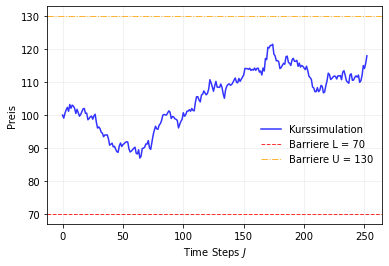

In [33]:
S = 100
L = 70
U = 130
K = 100
sigma = 0.25
r = 0.1
T =  0.5
iterations = n = M = 1
fair_value = 4.0004
J = 252

np.random.seed(47)
iterations = int(iterations); J = int(J) ; dt = T/J; t = np.linspace(0,T,J+1)[:,None];
Z = np.random.randn(J,iterations); X = np.cumsum(Z,axis =0)
X = np.vstack((np.zeros(iterations),X));
sJ = S*np.exp((r-0.5*sigma**2)*t+sigma*np.sqrt(dt)*X)


plt.plot(sJ, label = 'Kurssimulation', color = 'blue', alpha = 0.8)
plt.axhline(y = 70, label = 'Barriere L = 70', color = 'red', linestyle = '--', linewidth = 1, alpha = 0.8)
plt.axhline(y = 130, label = 'Barriere U = 130', color = 'orange', linestyle = '-.', linewidth = 1, alpha = 0.8)
#plt.axhline(y = 70, label = '.', color = 'red', linestyle = '--', linewidth = 1, alpha = 0)
#plt.axhline(y = 130, label = '.', color = 'red', linestyle = '--', linewidth = 1, alpha = 0)
#plt.title("CEV - Constant Elasticity of Variance")
plt.xlabel('Time Steps $J$')
plt.ylabel('Preis')
plt.legend(fancybox = True, framealpha=0, loc='upper right', bbox_to_anchor=(1, 0.5))
plt.grid(alpha = 0.2)
plt.savefig('DB_Kurs_L_U.png', dpi = 1000, transparent = True)
plt.show()

# Double Barrier Options

## Standard Methode

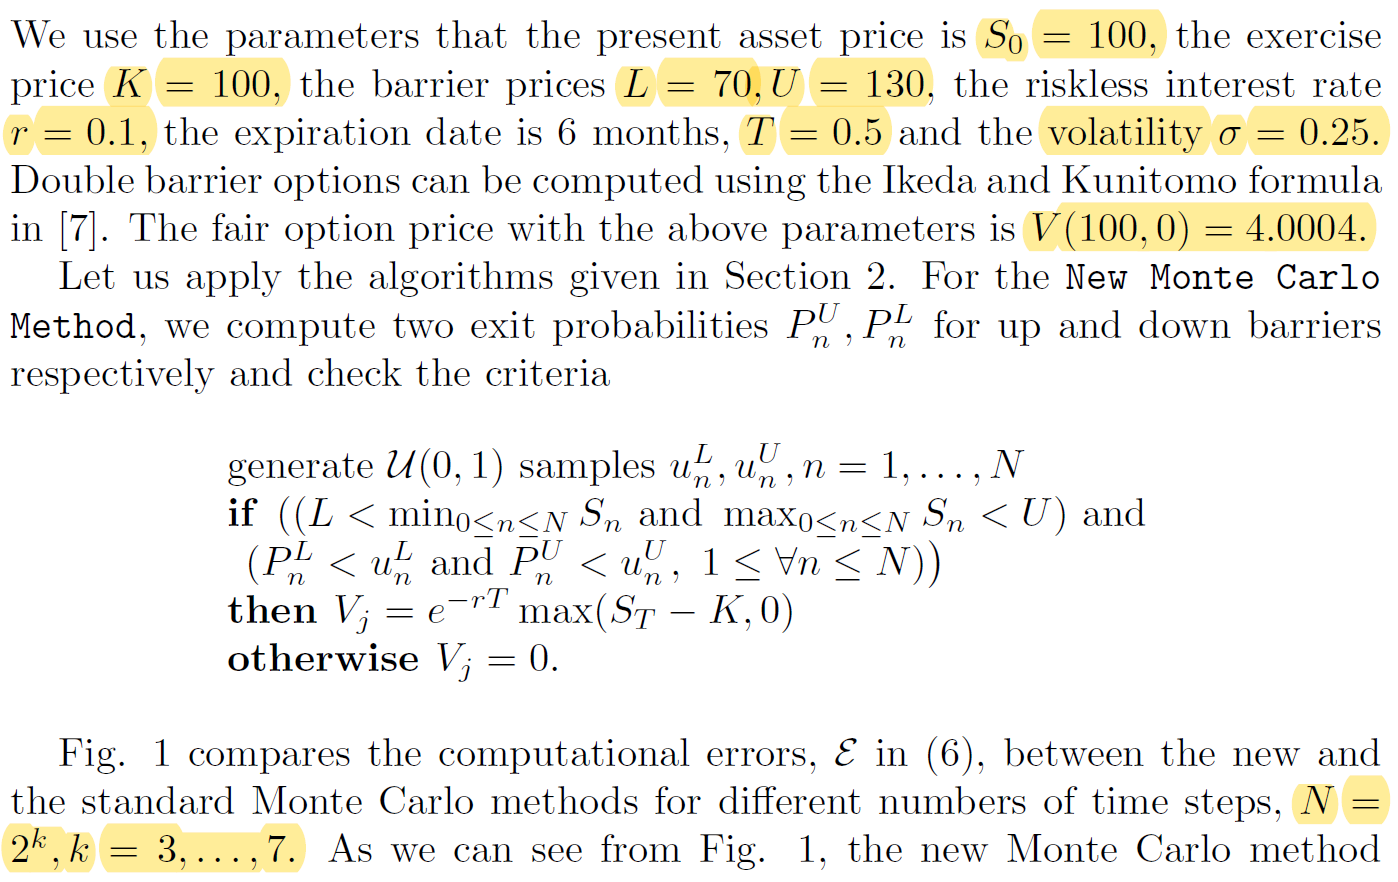

In [2]:
np.random.seed(47)

S = 100
L = 70
U = 130
K = 100
sigma = 0.25
r = 0.1
T =  0.5

iterations = n = M = 10**7


fair_value = 4.0004

test_range = [2**3,2**4,2**5,2**6,2**7]


# Tabelle erstellen, in welche die Werte gespeichert werden
column_names =  test_range + ['']
table_width = len(test_range)+1
table_empty = nans([7, table_width])
table_1 = pd.DataFrame(table_empty, columns = column_names)
table_1.iloc[0, 0] = 'n'
table_1.iloc[1, 0] = 'J'
table_1.iloc[2, 0] = 'Fair'
table_1.iloc[3, 0] = 'Preis'
table_1.iloc[4, 0] = 'Error'
table_1.iloc[5, 0] = 'Zeit'
table_1.iloc[6, 0] = 'Absolut'


for z in range(0,len(test_range)):
    
    zeit = datetime.now()
    print('-----------'+str(zeit.hour)+':'+str(zeit.minute)+':'+str(zeit.second)+'-----------')
    
    J = N = test_range[z]
    table_1.iloc[2, z] = fair_value
           
    table_1.iloc[0, z] = int(n)
    table_1.iloc[1, z] = int(J)
    print('n:',n,'\nJ:',J)
    
    print('Fair: ',round(fair_value,4))
    
    tic = time.perf_counter()

    price = pricing_cudo(S, sigma, T, r, J, iterations, U, L, K)
    
    toc = time.perf_counter()

        
    table_1.iloc[3, z] = price
    print('Preis:',round(price,4))
    
    error = fair_value - price
    table_1.iloc[4, z] = error
    if error < 0:
        print('Error:',round(abs(error),4),'zu hoch')
    else:
        print('Error:',round(error,4),'zu tief')
    
    absolut = abs(fair_value - price)
    table_1.iloc[6, z] = absolut
    
    ex_time = toc-tic
    table_1.iloc[5, z] = ex_time
    
    if (ex_time) > 3600:
        print('Zeit:',round(ex_time/3600,4),'Stunden')
    elif (ex_time < 60):
        print('Zeit:',round(ex_time,4),'Sekunden')
    else:
        print('Zeit:',round(ex_time/60,4),'Minuten')
table_1
table_1.to_excel('DB_Standard.xlsx')

# --------------------------------------------------------------------------------------------------------------

np.random.seed(47)


# Tabelle erstellen, in welche die Werte gespeichert werden
column_names =  test_range + ['']
table_width = len(test_range)+1
table_empty = nans([7, table_width])
table_2 = pd.DataFrame(table_empty, columns = column_names)
table_2.iloc[0, 0] = 'n'
table_2.iloc[1, 0] = 'J'
table_2.iloc[2, 0] = 'Fair'
table_2.iloc[3, 0] = 'Preis'
table_2.iloc[4, 0] = 'Error'
table_2.iloc[5, 0] = 'Zeit'
table_2.iloc[6, 0] = 'Absolut'


for z in range(0,len(test_range)):
    
    zeit = datetime.now()
    print('-----------'+str(zeit.hour)+':'+str(zeit.minute)+':'+str(zeit.second)+'-----------')
    
    J = N = test_range[z]
    table_2.iloc[2, z] = fair_value
           
    table_2.iloc[0, z] = int(n)
    table_2.iloc[1, z] = int(J)
    print('n:',n,'\nJ:',J)
    
    print('Fair: ',round(fair_value,4))
    
    tic = time.perf_counter()

    price = pricing_cudo_moon(S, sigma, T, r, J, iterations, U, L, K)
    
    toc = time.perf_counter()

        
    table_2.iloc[3, z] = price
    print('Preis:',round(price,4))
    
    error = fair_value - price
    table_2.iloc[4, z] = error
    if error < 0:
        print('Error:',round(abs(error),4),'zu hoch')
    else:
        print('Error:',round(error,4),'zu tief')
    
    absolut = abs(fair_value - price)
    table_2.iloc[6, z] = absolut
    
    ex_time = toc-tic
    table_2.iloc[5, z] = ex_time
    
    if (ex_time) > 3600:
        print('Zeit:',round(ex_time/3600,4),'Stunden')
    elif (ex_time < 60):
        print('Zeit:',round(ex_time,4),'Sekunden')
    else:
        print('Zeit:',round(ex_time/60,4),'Minuten')
table_2
table_2.to_excel('DB_Modifiziert.xlsx')
print('\nEnde')

-----------15:18:54-----------
n: 10000000 
J: 8
Fair:  4.0004
Preis: 4.9876
Error: 0.9872 zu hoch
Zeit: 3.2302 Sekunden
-----------15:18:57-----------
n: 10000000 
J: 16
Fair:  4.0004
Preis: 4.7444
Error: 0.744 zu hoch
Zeit: 6.071 Sekunden
-----------15:19:3-----------
n: 10000000 
J: 32
Fair:  4.0004
Preis: 4.553
Error: 0.5526 zu hoch
Zeit: 11.7108 Sekunden
-----------15:19:15-----------
n: 10000000 
J: 64
Fair:  4.0004
Preis: 4.4033
Error: 0.4029 zu hoch
Zeit: 23.5179 Sekunden
-----------15:19:38-----------
n: 10000000 
J: 128
Fair:  4.0004
Preis: 4.2939
Error: 0.2935 zu hoch
Zeit: 48.5592 Sekunden
-----------15:20:27-----------
n: 10000000 
J: 8
Fair:  4.0004
Preis: 4.2021
Error: 0.2017 zu hoch
Zeit: 6.6647 Sekunden
-----------15:20:33-----------
n: 10000000 
J: 16
Fair:  4.0004
Preis: 4.1647
Error: 0.1643 zu hoch
Zeit: 12.8543 Sekunden
-----------15:20:46-----------
n: 10000000 
J: 32
Fair:  4.0004
Preis: 4.1315
Error: 0.1311 zu hoch
Zeit: 25.3576 Sekunden
-----------15:21:12-----

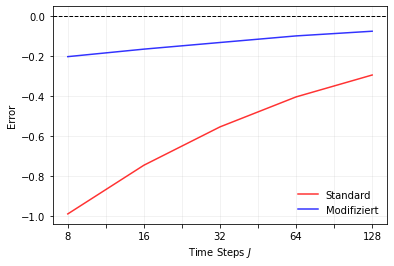

In [3]:
# Error Grafik normal

table_1.iloc[4].plot(kind = 'line', label = 'Standard', color = 'red', alpha = 0.8)
table_2.iloc[4].plot(kind = 'line', label = 'Modifiziert', color = 'blue', alpha = 0.8)
plt.axhline(y = 0, color = 'black', linestyle = '--', linewidth = 1)
plt.xlabel('Time Steps $J$')
plt.ylabel('Error')
plt.legend(fancybox = True, framealpha=0)
plt.grid(alpha = 0.2)
plt.savefig('DB_Error_normal.png', dpi = 1000, transparent = True)

plt.show()

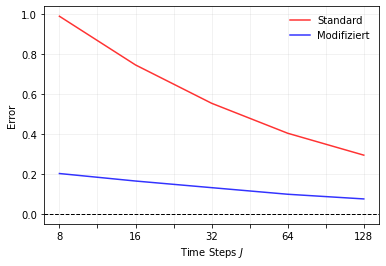

In [4]:
# Error Grafik absolut

table_1.iloc[6].plot(kind = 'line', label = 'Standard', color = 'red', alpha = 0.8)
table_2.iloc[6].plot(kind = 'line', label = 'Modifiziert', color = 'blue', alpha = 0.8)
plt.axhline(y = 0, color = 'black', linestyle = '--', linewidth = 1)
plt.xlabel('Time Steps $J$')
plt.ylabel('Error')
plt.legend(fancybox = True, framealpha=0)
plt.grid(alpha = 0.2)
plt.savefig('DB_Error_absolut.png', dpi = 1000, transparent = True)

plt.show()

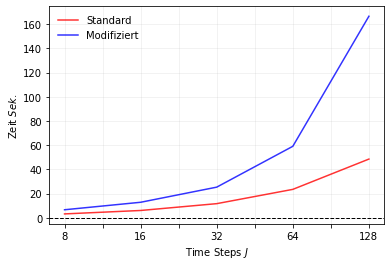

In [5]:
# Zeit Grafik

table_1.iloc[5].plot(kind = 'line', label = 'Standard', color = 'red', alpha = 0.8)
table_2.iloc[5].plot(kind = 'line', label = 'Modifiziert', color = 'blue', alpha = 0.8)
plt.axhline(y=0, color='black',linestyle='--', linewidth=1)
plt.xlabel('Time Steps $J$')
plt.ylabel('Zeit $Sek.$')
plt.legend(fancybox = True, framealpha=0)
plt.grid(alpha = 0.2)
plt.savefig('DB_Berechnungsdauer.png', dpi = 1000, transparent = True)

plt.show()